In [1]:
import os                              # operating system
import numpy as np                     # arrays and matrix math
import pandas as pd                    # Dataframes
import matplotlib.pyplot as plt        # plotting

In [3]:
os.chdir("/Volumes/GoogleDrive/My Drive/Research/07-Datascience GeoStats/Lesson-1")      # set working directory

In [27]:
df = pd.read_csv("2D_MV_200wells.csv")        # read in DataFrame (.csv file)
#print(df.iloc[0:5,:])                        # view the first 5 samples
df.head()                                     # view the first 5 samples. default 5. use n=... for other no.

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


In [15]:
df.describe(percentiles = [0.1,0.9]).transpose()            # summary statistics

,count,mean,std,min,10%,50%,90%,max
X,200.0,2053.400000,1113.524641,25.00000,414.00000,2160.00000,3510.00000,3955.0000
Y,200.0,1876.150000,1137.580160,35.00000,364.00000,1855.00000,3475.00000,3995.0000
facies_threshold_0.3,200.0,1.330000,0.471393,1.00000,1.00000,1.00000,2.00000,2.0000
porosity,200.0,0.149300,0.032948,0.05000,0.10610,0.15015,0.19014,0.2232
permeability,200.0,25.287462,64.470135,0.01582,0.26229,4.82550,56.53440,463.6410
acoustic_impedance,200.0,3.000435,0.592201,2.00900,2.19150,2.96450,3.83360,3.9840


In [29]:
#make a dictionary with old and new feature names
feature_names = {'facies_threshold_0.3':'facies','permeability':'perm','acoustic_impedance':'ai'}
df = df.rename(columns = feature_names)      # rename features
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


In [28]:
df_subsets = df.iloc[0:5,2:7]      # new DataFrame as a slice
df_subsets.head(n=10)

,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,1,0.1184,6.170,2.009
1,1,0.1566,6.275,2.864
2,2,0.1920,92.297,3.524
3,1,0.1621,9.048,2.157
4,1,0.1766,7.123,3.979


In [30]:
df_subsets2 = df.loc[:4,['X','facies','porosity','perm']]       # new DataFrame as a slice
df_subsets2.head()

,X,facies,porosity,perm
0,565,1,0.1184,6.170
1,2585,1,0.1566,6.275
2,2065,2,0.1920,92.297
3,3575,1,0.1621,9.048
4,1835,1,0.1766,7.123


In [31]:
df_deep_copy = df.copy(deep = True)        # deep copy of the DataFrame
df_deep_copy.loc[4,'ai'] = 4.0
df.head()
#df_deep_copy.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


In [24]:
df_shallow_copy = df.copy(deep = False)        # shallow copy of the DataFrame
df_shallow_copy.loc[4,'ai'] = 4.0
df.head()
#df_deep_copy.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,4.000


In [34]:
zeros12 = np.zeros(len(df))
df['zeros'] = zeros12       # add feature 
df.head()

,X,Y,facies,porosity,perm,ai,zeros
0,565,1485,1,0.1184,6.170,2.009,0.0
1,2585,1185,1,0.1566,6.275,2.864,0.0
2,2065,2865,2,0.1920,92.297,3.524,0.0
3,3575,2655,1,0.1621,9.048,2.157,0.0
4,1835,35,1,0.1766,7.123,3.979,0.0


In [35]:
df = df.drop('zeros', axis = 1)     # remove feature
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


In [36]:
df_row_drop = df.drop(3,axis=0)     # remove a row
df_row_drop.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
4,1835,35,1,0.1766,7.123,3.979
5,3375,2525,1,0.1239,1.468,2.337


In [37]:
# Feature Engineering
df['porosity%'] = df['porosity']*100        # add a new feature with porosity percentage
df['permpor'] = df['perm']/df['porosity']   # add a new feature with perm/porosity
df.head()

,X,Y,facies,porosity,perm,ai,porosity%,permpor
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542
3,3575,2655,1,0.1621,9.048,2.157,16.21,55.817397
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088


In [38]:
# Conditional Manipulation
df['tporosity'] = np.where(df['porosity'] >= 0.12, 'high', 'low')     # make a new categorical feature
df.head()

,X,Y,facies,porosity,perm,ai,porosity%,permpor,tporosity
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243,high
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high
3,3575,2655,1,0.1621,9.048,2.157,16.21,55.817397,high
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088,high


In [39]:
df['perm_cutoff'] = np.where(df['porosity'] >= 0.12, df['perm'], 0.0001)   # new feature with conditional truncation
df.head()

,X,Y,facies,porosity,perm,ai,porosity%,permpor,tporosity,perm_cutoff
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243,high,6.2750
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
3,3575,2655,1,0.1621,9.048,2.157,16.21,55.817397,high,9.0480
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088,high,7.1230


In [40]:
df.loc[1,'porosity'] = np.NaN                # add a NaN value in our table
print('Number of null values in our DataFrame = ', str(df.isnull().sum().sum()))    #count missing values
nan_rows = df[df['porosity'].isnull()]       # find the sample with missing values
print(nan_rows)                              # print this sample

Number of null values in our DataFrame =  1
      X     Y  facies  porosity   perm     ai  porosity%    permpor tporosity  \
1  2585  1185       1       NaN  6.275  2.864      15.66  40.070243      high   

   perm_cutoff  
1        6.275  


In [41]:
#likewise deletion (!Caution. use imputation instead of this for most cases)
df = df.dropna(how = 'any')     # drop any rows (samples) with at least one missing values
df.head()

,X,Y,facies,porosity,perm,ai,porosity%,permpor,tporosity,perm_cutoff
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
3,3575,2655,1,0.1621,9.048,2.157,16.21,55.817397,high,9.0480
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680


In [44]:
# Conditional slicing
df_extract = df.loc[(df['porosity'] > 0.12) & (df['perm'] > 10.0)]    #extract with multiple values to new table
df_extract.head()

,X,Y,facies,porosity,perm,ai,porosity%,permpor,tporosity,perm_cutoff
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.297
6,2295,1325,1,0.1790,31.933,3.491,17.90,178.396648,high,31.933
7,3715,3045,2,0.1914,116.781,2.187,19.14,610.141066,high,116.781
13,545,3765,1,0.1817,14.311,3.045,18.17,78.761695,high,14.311
15,1385,2415,2,0.1774,22.578,2.711,17.74,127.271702,high,22.578


In [47]:
# Making a DataFrame from scratch
por = df['porosity'].values         # extract porosity column as a vector
perm = df['perm'].values            # extract permeability column as vector
df_new = pd.DataFrame({'porosity':por,'permeability':perm})    # make a new DataFrame from the vectors
df_new.head()

,porosity,permeability
0,0.1184,6.170
1,0.1920,92.297
2,0.1621,9.048
3,0.1766,7.123
4,0.1239,1.468


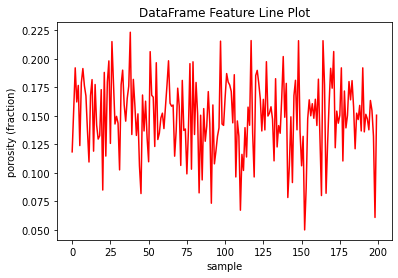

In [52]:
# Basic Plotting
df['porosity'].plot(kind='line', color='red')    # make a line plot
plt.ylabel('porosity (fraction)')
plt.xlabel('sample')
plt.title('DataFrame Feature Line Plot')
plt.show()

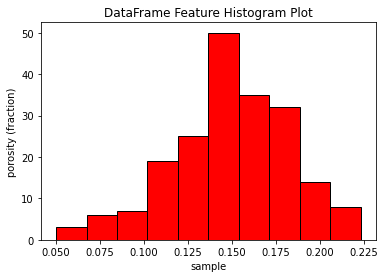

In [56]:
# Basic Plotting 2
df['porosity'].plot(kind = 'hist', color = 'red', edgecolor = 'black')    # make a histogram
plt.ylabel('porosity (fraction)')
plt.xlabel('sample')
plt.title('DataFrame Feature Histogram Plot')
plt.show()

In [58]:
print(df.values)

[[565 1485 1 ... 52.111486486486484 'low' 0.0001]
 [2065 2865 2 ... 480.71354166666674 'high' 92.29700000000001]
 [3575 2655 1 ... 55.81739666872301 'high' 9.048]
 ...
 [375 1705 1 ... 18.198334595003786 'high' 2.404]
 [3795 535 1 ... 0.25968483256730135 'low' 0.0001]
 [3455 1645 1 ... 6.578073089700997 'high' 0.99]]


In [61]:
# Retrive specific values

por1 = df.values[0,3]
print(por1)

0.1184


In [64]:
# Convert DataFrame to Numpy NDArray
df_array = df.to_numpy()                             #copy DataFrame to ndarray
print('We just made a '+str(type(df_array)))
print('of shape '+str(df_array.shape))

We just made a <class 'numpy.ndarray'>
of shape (199, 10)


In [65]:
list(df)

['X',
 'Y',
 'facies',
 'porosity',
 'perm',
 'ai',
 'porosity%',
 'permpor',
 'tporosity',
 'perm_cutoff']

In [66]:
# Directly edit DataFrames
print('The value of the first porosity was '+str(df.at[0,'porosity']))
df.at[0,'porosity'] = 0.2000                                          #set value of sample 0 of porosity feature
print('The value of porosity of sample 0 is now '+str(df.loc[0,'porosity'])+ '.')
df.head()

The value of the first porosity was 0.1184
The value of porosity of sample 0 is now 0.2.


,X,Y,facies,porosity,perm,ai,porosity%,permpor,tporosity,perm_cutoff
0,565,1485,1,0.2000,6.170,2.009,11.84,52.111486,low,0.0001
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
3,3575,2655,1,0.1621,9.048,2.157,16.21,55.817397,high,9.0480
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680


In [67]:
# saving to a file
df.to_csv("2D_MV_200wells_OUT.csv")       # write to df DataFrame to a csv